
#Codeless Con: Build An NFT CryptoSheets Using Covalent API
#Submission from: **Jakob Richert**
#Gitcoin Bounty Link: https://gitcoin.co/issue/covalenthq/covalent-gitcoin-bounties/18/100027635

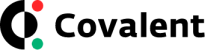

gc-h-pos.103e252f8ca8.svg





# Click the arrow to see the code for generating the datasheet below

In [ ]:
#The code here generates a table of all the crypto data using the covalent api
#The binance chain and avalanche/polygon test chains were not working with the API at this time
from doctest import master
from urllib import request
import requests
import json
import pandas as pd
import sqlite3
from google.colab import data_table
data_table.enable_dataframe_formatter()


masterlist = []

def maketable(url):
  thisdata = []
  data = requests.get(url)
  chain = json.loads(data.text)
  for x in chain['data']['items']:
    thisdata.append(x)
  return thisdata

#Ethereum
Ethereum = maketable('https://api.covalenthq.com/v1/1/nft_market/?format=JSON&page-size=10000&key=ckey_762a27bc3b6f4f2dbc03aeb8554')
#Polygon
Polygon = maketable('https://api.covalenthq.com/v1/137/nft_market/?format=JSON&page-size=1000000&key=ckey_762a27bc3b6f4f2dbc03aeb8554')
#Polygon testnet
#Polygon2 = maketable('https://api.covalenthq.com/v1/80001/nft_market/?format=JSON&page-size=1000000&key=ckey_762a27bc3b6f4f2dbc03aeb8554')
#Avalanche
Avalanche = maketable('https://api.covalenthq.com/v1/43114/nft_market/?format=JSON&page-size=1000000&key=ckey_762a27bc3b6f4f2dbc03aeb8554')
#Fantom
Fantom = maketable('https://api.covalenthq.com/v1/250/nft_market/?format=JSON&page-size=1000000&key=ckey_762a27bc3b6f4f2dbc03aeb8554')

masterlist.extend(Ethereum)
masterlist.extend(Polygon)
#masterlist.extend(Polygon2)
masterlist.extend(Avalanche)
masterlist.extend(Fantom)

masterlist = pd.DataFrame.from_dict(masterlist)

masterlist.to_excel('master.xlsx')

#We will now show some of the table data (starting with the top 20 items of the sheet and following with the bottom 20)
#You will be able to download this sheet and database file on 
#github.com/jakobrichert

In [ ]:
showdata = pd.read_excel('./master.xlsx')
showdata.head()

,Unnamed: 0,chain_id,collection_name,collection_address,volume_wei_24h,volume_quote_24h,avg_volume_wei_24h,avg_volume_quote_24h,contract_deployment_at,market_cap_wei,market_cap_quote,transaction_count_alltime,unique_wallet_purchase_count_alltime,unique_token_ids_sold_count_alltime,max_price_wei,max_price_quote,floor_price_wei_7d,floor_price_quote_7d,gas_quote_rate,quote_currency,opening_date
0,0,1,Rarible,0xd07dc4262bcdbf85190c01c996b4c06a461d2430,455803000000000000,1348.53200,11994815789473700,35.487686,2020-05-27T11:49:56Z,6269271259687780000000000000000,1.854817e+16,129114,44173,34484,297660000000000000000,880652.50,64745674439627100,1.915556e+02,2958.5852,USD,2022-03-01
1,1,1,Town Star,0xc36cf0cfcb5d905b8b513860db0cfe63f6cf9f5c,28500000000000000,84.31968,9500000000000000,28.106560,2020-06-04T10:24:49Z,35981883969154600000000000,1.064555e+11,105,22,42,36000000000000000000,106509.07,13375000000000000,3.957108e+01,2958.5852,USD,2022-03-01
2,2,1,Fantasy Islands - Sandbox,0x68aea268f92b715e073d2f5170039faa4b94a47b,0,0.00000,0,0.000000,2021-08-20T00:00:55Z,1153800000000000000000000,3.413616e+09,87,74,1,11666000000000000000000,34514856.00,7770666666666670000000,2.299018e+07,2958.5852,USD,2022-03-01
3,3,1,Sandbox's LANDs,0x50f5474724e0ee42d9a4e711ccfb275809fd6d4a,0,0.00000,0,0.000000,NaN,263547080954828000000000,7.797265e+08,88304,18916,37782,150000000000000000000,443787.78,3577416666666670000,1.058409e+04,2958.5852,USD,2022-03-01
4,4,1,BoredApeYachtClub,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,0,0.00000,0,0.000000,2021-04-22T03:03:16Z,257858656076322000000000,7.628968e+08,28018,9495,8557,1080690000000000000000,3197313.50,102203635767196000000,3.023782e+05,2958.5852,USD,2022-03-01


In [ ]:
showdata.tail()

,Unnamed: 0,chain_id,collection_name,collection_address,volume_wei_24h,volume_quote_24h,avg_volume_wei_24h,avg_volume_quote_24h,contract_deployment_at,market_cap_wei,market_cap_quote,transaction_count_alltime,unique_wallet_purchase_count_alltime,unique_token_ids_sold_count_alltime,max_price_wei,max_price_quote,floor_price_wei_7d,floor_price_quote_7d,gas_quote_rate,quote_currency,opening_date
12920,12920,250,Alpaca Finance NFT,0x81443d50206bb5c23d8a9bdcafc1a691945420f9,2000000000000000000,3.657106,2000000000000000000,3.657106,2022-02-10T11:30:43Z,17800000000000000000,32.548250,12,6,12,2000000000000000000,3.657106,1490000000000000000,2.724544,1.828553,USD,2022-03-01
12921,12921,250,Gorgon Medusa,0x20524979212021e4be429811e58bcbac7625a0e4,0,0.000000,0,0.000000,2021-12-31T12:26:42Z,15655000000000000000,28.626000,4,4,3,12000000000000000000,21.942638,2500000000000000000,4.571383,1.828553,USD,2022-03-01
12922,12922,250,SpookyVerse Ecosystem,0x44d05abbcd94ab5503c1c5dda374a7d4d7e35137,0,0.000000,0,0.000000,2022-02-06T23:01:20Z,10000000000000000000,18.285532,1,1,1,10000000000000000000,18.285532,10000000000000000000,18.285532,1.828553,USD,2022-03-01
12923,12923,250,DuelistKingItem,0x6c375585a31718c38d4e3eb3eddbfb203f142834,0,0.000000,0,0.000000,NaN,6500000000000000000,11.885595,5,5,5,20000000000000000000,36.571064,3250000000000000000,5.942798,1.828553,USD,2022-03-01
12924,12924,250,Fantom Shroomies,0x7e797a82de0c182efe8b89e04aba0426f657b774,0,0.000000,0,0.000000,2022-02-18T20:45:17Z,3000000000000000000,5.485660,1,1,1,3000000000000000000,5.485660,3000000000000000000,5.485660,1.828553,USD,2022-03-01


#Next we will transform the data sheet into a database file (click the arrow to see the code)

In [ ]:
#Connects to our database file named masterdb and reads our excel data into it (we can now perform sql queries on the nft data)
con = sqlite3.connect("masterdb.db")
dfs = pd.read_excel('master.xlsx', sheet_name=None)
for table, df in dfs.items():
    try:
      df.to_sql(table, con)
    except:
      pass

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


#Then we write the 10 questions as SQL queries (click the arrow below to see the SQL query logic)

In [ ]:
#QUERY 1 Shows the top 5 collections on Ethereum by quoted market cap
query1 = '''select collection_name
FROM Sheet1
WHERE chain_id == 1 
ORDER BY market_cap_quote DESC
LIMIT 5;'''

In [ ]:
#QUERY 2 Shows the top 5 collections on Polygon by quoted market cap
query2 = '''select collection_name
FROM Sheet1
WHERE chain_id == 137 
ORDER BY market_cap_quote DESC
LIMIT 5;'''

In [ ]:
#QUERY 3 Shows the top 5 collections on Avalanche by quoted market cap
query3 = '''select collection_name
FROM Sheet1
WHERE chain_id == 43114 
ORDER BY market_cap_quote DESC
LIMIT 5;'''

In [ ]:
#QUERY 4 Shows the top 5 collections on Fantom by quoted market cap 
query4 = '''select collection_name
FROM Sheet1
WHERE chain_id == 250 
ORDER BY market_cap_quote DESC
LIMIT 5;'''

In [ ]:
#QUERY 5 shows the amount of collections by chain id
query5 = '''SELECT count(*), chain_id FROM Sheet1 
GROUP BY (chain_id)
ORDER BY count(*) DESC;'''

In [ ]:
#QUERY 6 shows the earliest contract deployment on Ethereum
query6 ='''SELECT collection_name, contract_deployment_at FROM Sheet1
WHERE chain_id = 1 and contract_deployment_at NOTNULL
ORDER BY (contract_deployment_at)
LIMIT 1;'''

In [ ]:
#QUERY 7 shows the earliest contract deployment on Polygon
query7 ='''SELECT collection_name, contract_deployment_at FROM Sheet1
WHERE chain_id = 137 and contract_deployment_at NOTNULL
ORDER BY (contract_deployment_at)
LIMIT 1;'''

In [ ]:
#QUERY 8 shows the earliest contract deployment on Avalanche
query8 = '''SELECT collection_name, contract_deployment_at FROM Sheet1
WHERE chain_id = 43114 and contract_deployment_at NOTNULL
ORDER BY (contract_deployment_at)
LIMIT 1;'''

In [ ]:
#QUERY 9 shows the earliest contract deployment on Fantom
query9 = '''SELECT collection_name, contract_deployment_at FROM Sheet1
WHERE chain_id = 250 and contract_deployment_at NOTNULL
ORDER BY (contract_deployment_at)
LIMIT 1;'''

In [ ]:
#QUERY 10 shows the highest transaction count collection out of all chains
query10 = '''SELECT collection_name FROM Sheet1
ORDER BY transaction_count_alltime DESC
LIMIT 1;'''

#Now that we have written all of our questions about the NFT data, we will find the results and print the data 

In [ ]:
cur = con.cursor()
cur.execute(query1)
q1 = (cur.fetchall())
print('The following are the top 5 collections by quoted market cap on Ethereum')
for i in range (5):
  print(q1[i][0])

The following are the top 5 collections by quoted market cap on ethereum
Rarible
Town Star
Fantasy Islands - Sandbox 
Sandbox's LANDs
BoredApeYachtClub


In [ ]:
cur.execute(query2)
q2 = (cur.fetchall())
print('The following are the top 5 collections by quoted market cap on Polygon')
for i in range (5):
  print(q2[i][0])


The following are the top 5 collections by quoted market cap on polygon
ZED Horse
Crypto Unicorns
Chicken Derby
DeRace Horses
Chumbi


In [ ]:
cur.execute(query3)
q3 = (cur.fetchall())
print('The following are the top 5 collections by quoted market cap on Avalanche')
for i in range (5):
  print(q3[i][0])


The following are the top 5 collections by quoted market cap on Avalanche
Universe Ecosystem
Pizza Game Chefs
Sheep Game
Police & Thief Game
Cauldron


In [ ]:
cur.execute(query4)
q4 = (cur.fetchall())
print('The following are the top 5 collections by quoted market cap on Fantom')
for i in range (5):
  print(q4[i][0])

The following are the top 5 collections by quoted market cap on Fantom
Nautilus
SpookyVerse Ecosystem
Basic Apes Token
Humans VS Zombies
FantomFrogs


In [ ]:
cur.execute(query5)
q5 = (cur.fetchall())
print('The following are the amount of collections based on chain ID (1 = ethereum, 137 = polygon, 43114 = avalanche, 250 = fantom')
for i in range (4):
  print('Amount:',q5[i][0],'Chain Id:',q5[i][1])
  

The following are the amount of collections based on chain ID (1 = ethereum, 137 = polygon, 43114 = avalanche, 250 = fantom
Amount: 9039 Chain Id: 1
Amount: 3545 Chain Id: 137
Amount: 308 Chain Id: 43114
Amount: 33 Chain Id: 250


In [ ]:
cur.execute(query6)
q6 = (cur.fetchall())
print('The oldest contract deployment on Ethereum is:', q6[0][0], 'on', q6[0][1])

The oldest contract deployment on ethereum is: CryptoKitties on 2017-11-23T05:41:19Z


In [ ]:
cur.execute(query7)
q7 = (cur.fetchall())
print('The oldest contract deployment on Polygon is:', q7[0][0], 'on', q7[0][1])

The oldest contract deployment on Polygon is: Neon District Season One Item on 2020-08-13T19:05:14Z


In [ ]:
cur.execute(query8)
q8 = (cur.fetchall())
print('The oldest contract deployment on Avalanche is:', q8[0][0], 'on', q8[0][1])

The oldest contract deployment on Avalanche is: CryptoSeals on 2021-03-22T14:07:07Z


In [ ]:
cur.execute(query9)
q9 = (cur.fetchall())
print('The oldest contract deployment on Fantom is:', q9[0][0], 'on', q9[0][1])

The oldest contract deployment on Fantom is: CryptoWormzNFT on 2021-10-29T17:20:52Z


In [ ]:
cur.execute(query10)
q10 = (cur.fetchall())
print('The collection with the most transactions compared on all chains is:', q10[0][0])

The Collection with the most transactions compared on all chains is: ZED Horse
